In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import asyncio


In [12]:
import finance.moex.shares as mf

vtb = mf.share_adjusted("VTBR", verbose=True)
trnf = mf.share_adjusted("TRNFP")
sber = mf.share_adjusted("SBER")
gazp = mf.share_adjusted("GAZP")
pik = mf.share_adjusted("PIKK")

vtb, trnf, sber, gazp, pik = await asyncio.gather(vtb, trnf, sber, gazp, pik)

print(trnf.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'dividend', 'split_ratio',
       'adj_close', 'logret'],
      dtype='object')


In [10]:
import finance.moex.index_groups as idx_groups

igs = idx_groups.get_df()
display(igs)

,index,desc,group
0,IMOEX,Индекс МосБиржи (рубли),broad_market
1,IMOEX10,Индекс МосБиржи 10,broad_market
2,RTSI,RTS Index (доллары США),broad_market
3,IMOEX2,Индекс МосБиржи 2 (расширенный рынок),broad_market
4,MOEXOG,Нефть и газ,sectoral
5,MOEXFN,Финансовый сектор,sectoral
6,MOEXCN,Потребительский сектор,sectoral
7,MOEXMM,Металлы и добыча,sectoral
8,MOEXCH,Химия и нефтехимия,sectoral
9,MOEXTN,Телекоммуникации,sectoral


In [14]:
import finance.moex.index as index

ofz = index.fetch_index(verbose=True)
og = index.fetch_index("MOEXOG", verbose=True)
ofz, og = await asyncio.gather(ofz, og)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")

In [80]:
def plot_share(data, name=""):
    sns.lineplot(data=data, x=data.index, y="adj_close", label="TRNFP ADJ", alpha=0.5)
    sns.lineplot(data=data, x=data.index, y="close", label="TRNFP", alpha=0.5)

    div_data = data[data["dividend"] != 0]
    div_sizes = div_data["dividend"] / div_data["close"] * 500
    ax = sns.scatterplot(data=div_data, x=div_data.index, y="close", c="r", size=div_sizes, legend=False)
    
    plt.tight_layout()
    if name:
        plt.title(name)
    plt.show()

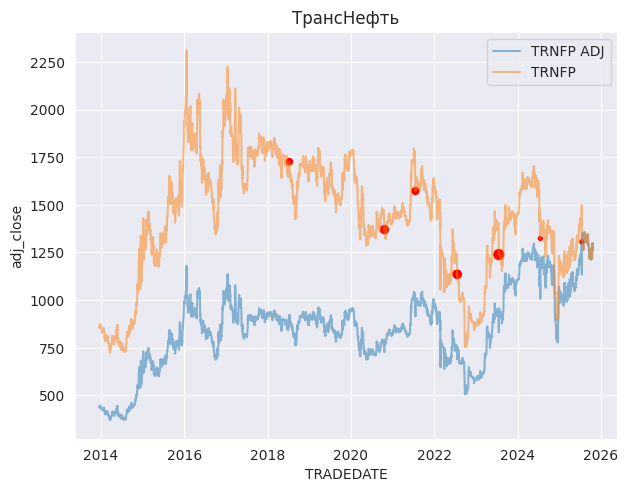

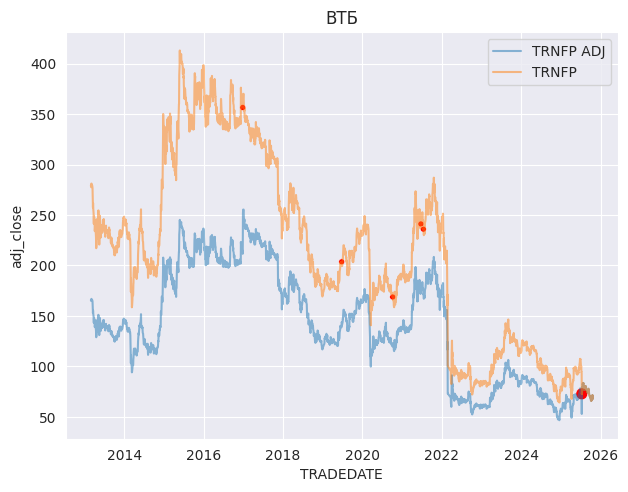

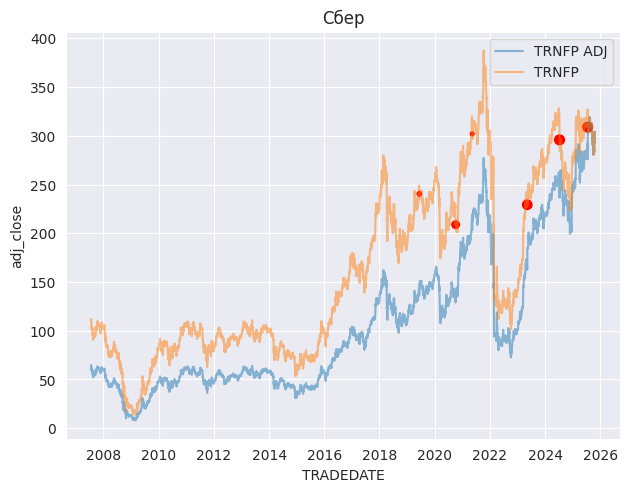

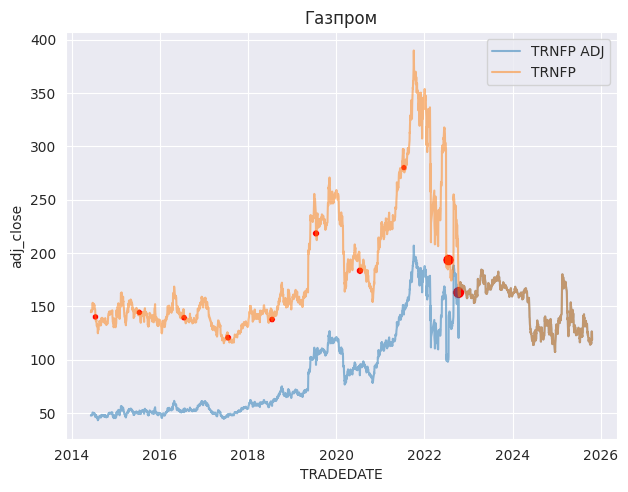

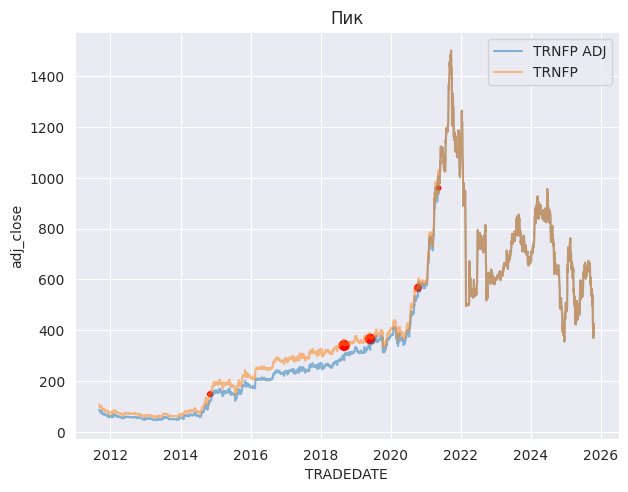

In [81]:
plot_share(trnf, "ТрансНефть")
plot_share(vtb, "ВТБ")
plot_share(sber, "Сбер")
plot_share(gazp, "Газпром")
plot_share(pik, "Пик")

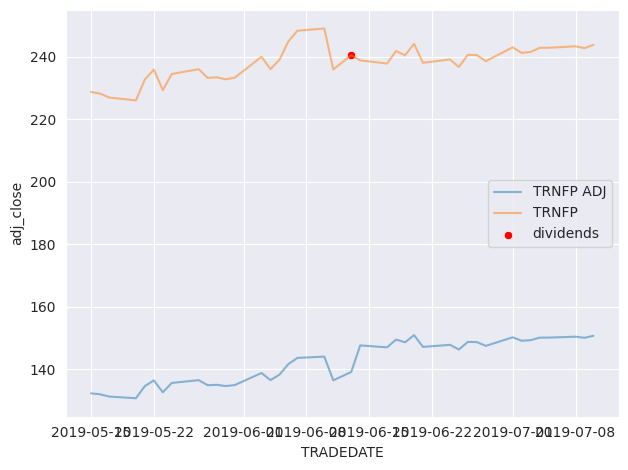

In [11]:
b = 20
i = 0
org = sber

idx = (org["dividend"] != 0.0).to_numpy().flatten().nonzero()[0][i].item()
iota = list(range(idx - b, idx + b))
org_subs = org.iloc[iota].copy()
plot_share(org_subs)